In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [42]:
df=pd.DataFrame(columns=['path','label'])
for directory_name, _, filenames in os.walk('/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor'):
    for filename in filenames:
        df=df.append(pd.DataFrame([[os.path.join(directory_name, filename),'glioma tumor']], columns=['path', 'label']))
for directory_name, _, filenames in os.walk('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor'):
    for filename in filenames:
        df=df.append(pd.DataFrame([[os.path.join(directory_name, filename),'meningioma_tumor']], columns=['path', 'label']))
for directory_name, _, filenames in os.walk('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor'):
    for filename in filenames:
        df=df.append(pd.DataFrame([[os.path.join(directory_name, filename),'pituitary_tumor']], columns=['path', 'label']))
for directory_name, _, filenames in os.walk('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor'):
    for filename in filenames:
        df=df.append(pd.DataFrame([[os.path.join(directory_name, filename),'no_tumor']], columns=['path', 'label']))
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,path,label
0,/kaggle/input/brain-tumor-classification-mri/T...,glioma tumor
1,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
2,/kaggle/input/brain-tumor-classification-mri/T...,meningioma_tumor
3,/kaggle/input/brain-tumor-classification-mri/T...,glioma tumor
4,/kaggle/input/brain-tumor-classification-mri/T...,meningioma_tumor
5,/kaggle/input/brain-tumor-classification-mri/T...,meningioma_tumor
6,/kaggle/input/brain-tumor-classification-mri/T...,glioma tumor
7,/kaggle/input/brain-tumor-classification-mri/T...,meningioma_tumor
8,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
9,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = px.scatter(data_frame = df,x=df.index,y='label',color='label',title='Distribution of fire and non-fire images along the length of the dataframe')
fig.update_traces(marker_size=2)

In [45]:
fig=px.histogram(df, x='label')
fig.show()

In [46]:
x=df['label'].value_counts()
y=df['label'].unique()
fig=px.pie(values=x, names=y)
fig.show()

In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

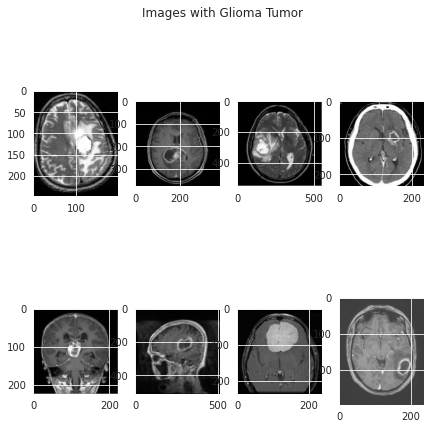

In [88]:
label = 'glioma tumor' #label for images with fire
data = df[df['label'] == label]

pics = 10 #set the number of pics
fig,ax = plt.subplots(int(pics//4),4,figsize=(7,7))
plt.suptitle('Images with Glioma Tumor')
ax = ax.ravel()
for i in range((pics//4)*4):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)

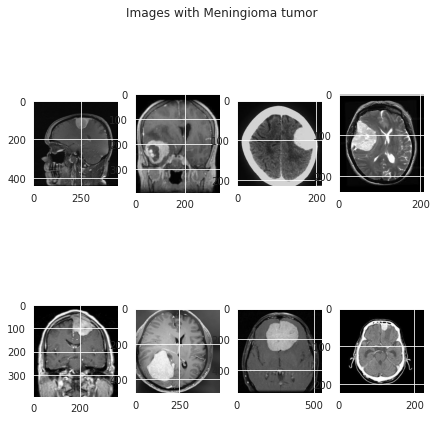

In [87]:
label = 'meningioma_tumor' #label for images with fire
data = df[df['label'] == label]

pics = 10 #set the number of pics
fig,ax = plt.subplots(int(pics//4),4,figsize=(7,7))
plt.suptitle('Images with Meningioma tumor')
ax = ax.ravel()
for i in range((pics//4)*4):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)

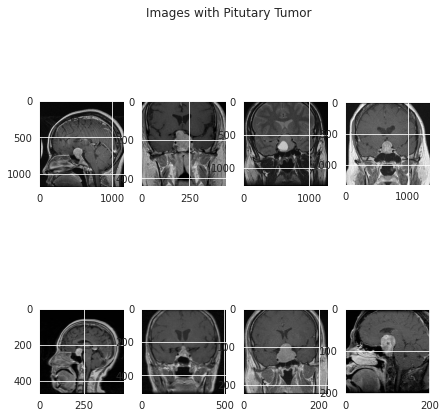

In [86]:
label = 'pituitary_tumor' #label for images with fire
data = df[df['label'] == label]

pics = 10 #set the number of pics
fig,ax = plt.subplots(int(pics//4),4,figsize=(7,7))
plt.suptitle('Images with Pitutary Tumor')
ax = ax.ravel()
for i in range((pics//4)*4):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)

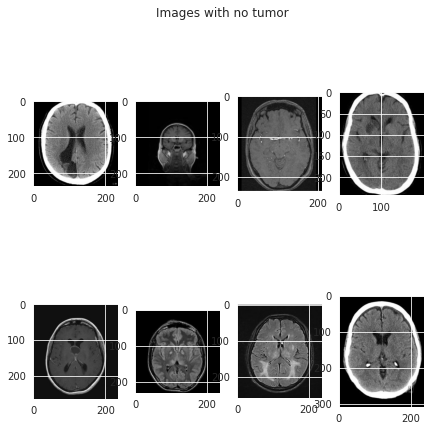

In [85]:
label = 'no_tumor' #label for images with fire
data = df[df['label'] == label]

pics = 10 #set the number of pics
fig,ax = plt.subplots(int(pics//4),4,figsize=(7,7))
plt.suptitle('Images with no tumor')
ax = ax.ravel()
for i in range((pics//4)*4):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)

In [52]:
def shaper(row):
    shape = image.load_img(row['path']).size
    row['height'] = shape[1]
    row['width'] = shape[0]
    return row
df = df.apply(shaper,axis=1)
df.head(5)

,path,label,height,width
0,/kaggle/input/brain-tumor-classification-mri/T...,glioma tumor,512,512
1,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor,228,235
2,/kaggle/input/brain-tumor-classification-mri/T...,meningioma_tumor,398,369
3,/kaggle/input/brain-tumor-classification-mri/T...,glioma tumor,249,200
4,/kaggle/input/brain-tumor-classification-mri/T...,meningioma_tumor,248,239


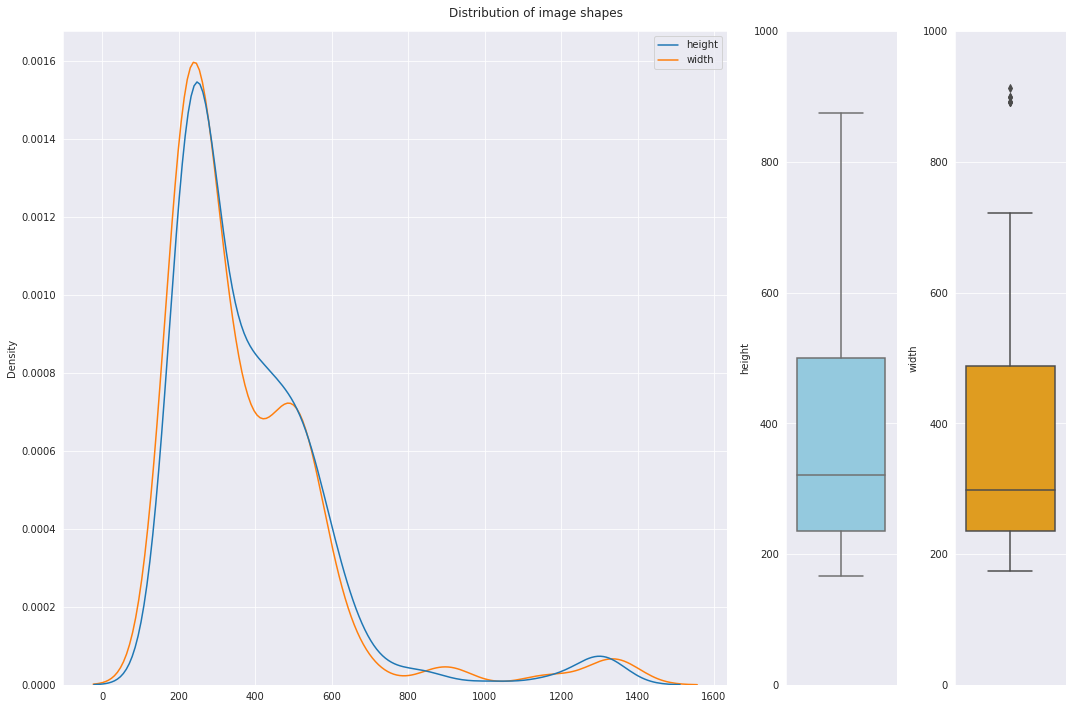

In [53]:
sns.set_style('darkgrid')
fig,(ax1,ax2,ax3) = plt.subplots(1,3,gridspec_kw={'width_ratios': [3,0.5,0.5]},figsize=(15,10))
sns.kdeplot(data=df.drop(columns=['path','label']),ax=ax1,legend=True)
sns.boxplot(data=df,y='height',ax=ax2,color='skyblue')
sns.boxplot(data=df,y='width',ax=ax3,color='orange')
plt.suptitle('Distribution of image shapes')
ax3.set_ylim(0,1000)
ax2.set_ylim(0,1000)
plt.tight_layout()

In [15]:
df_original = df.copy()
# Split into training, test and validation sets
val_index = int(df_original.shape[0]*0.1)
train_df = df_original.iloc[val_index:]
test_df = df_original.iloc[:val_index]

In [16]:
train_df.shape,test_df.shape

((355, 4), (39, 4))

In [90]:
print(train_df)

                                                  path             label  \
39   /kaggle/input/brain-tumor-classification-mri/T...      glioma tumor   
40   /kaggle/input/brain-tumor-classification-mri/T...   pituitary_tumor   
41   /kaggle/input/brain-tumor-classification-mri/T...      glioma tumor   
42   /kaggle/input/brain-tumor-classification-mri/T...  meningioma_tumor   
43   /kaggle/input/brain-tumor-classification-mri/T...      glioma tumor   
..                                                 ...               ...   
389  /kaggle/input/brain-tumor-classification-mri/T...          no_tumor   
390  /kaggle/input/brain-tumor-classification-mri/T...          no_tumor   
391  /kaggle/input/brain-tumor-classification-mri/T...      glioma tumor   
392  /kaggle/input/brain-tumor-classification-mri/T...          no_tumor   
393  /kaggle/input/brain-tumor-classification-mri/T...      glioma tumor   

     height  width  
39      249    200  
40     1304   1338  
41      236    236  
42 

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rotation_range= 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range = 2,
    zoom_range=0.2,
    rescale = 1/255,
    validation_split=0.1,
)
test_generator=ImageDataGenerator()

In [18]:
train_gen = train_generator.flow_from_dataframe(train_df,x_col='path',y_col='label',images_size=(256,256),class_mode='categorical',subset='training')
valid_gen = train_generator.flow_from_dataframe(train_df,x_col='path',y_col='label',images_size=(256,256),class_mode='categorical',subset='validation')
test_gen= test_generator.flow_from_dataframe(test_df,x_col='path',y_col='label',images_size=(256,256),class_mode='categorical')

Found 320 validated image filenames belonging to 4 classes.
Found 35 validated image filenames belonging to 4 classes.
Found 39 validated image filenames belonging to 4 classes.


In [20]:
class_indices = {}
for key in train_gen.class_indices.keys():
    class_indices[train_gen.class_indices[key]] = key
    
print(class_indices)

{0: 'glioma tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}


In [21]:
class_indices = {}
for key in valid_gen.class_indices.keys():
    class_indices[valid_gen.class_indices[key]] = key
    
print(class_indices)

{0: 'glioma tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}


In [22]:
class_indices = {}
for key in test_gen.class_indices.keys():
    class_indices[test_gen.class_indices[key]] = key
    
print(class_indices)

{0: 'glioma tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}


In [28]:
# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D
from tensorflow.keras.layers import MaxPooling2D

model = Sequential()
#input layer- Convolution layer with max pooling layer
model.add(Conv2D(filters=16,kernel_size = (2,2),activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32,kernel_size = (2,2),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128,kernel_size=(2,2),activation='relu'))
model.add(MaxPooling2D())
#flatten layer
model.add(Flatten())
# Fully connected layer
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation = 'relu'))
# Output layer
model.add(Dense(4,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 255, 255, 16)      208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 126, 126, 32)      2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 62, 62, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 128)      

In [29]:
from tensorflow.keras.metrics import Recall,AUC
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy',Recall(),AUC()])

history=model.fit(train_gen,batch_size=32,epochs=50,validation_data=valid_gen)

Epoch 1/50
10/10 [==============================] - 12s 1s/step - loss: 1.3667 - accuracy: 0.2969 - recall_2: 0.0000e+00 - auc_2: 0.5717 - val_loss: 1.3644 - val_accuracy: 0.2857 - val_recall_2: 0.0000e+00 - val_auc_2: 0.5906
Epoch 2/50
10/10 [==============================] - 10s 963ms/step - loss: 1.2951 - accuracy: 0.3875 - recall_2: 0.0562 - auc_2: 0.6711 - val_loss: 1.2051 - val_accuracy: 0.4286 - val_recall_2: 0.0571 - val_auc_2: 0.7325
Epoch 3/50
10/10 [==============================] - 10s 985ms/step - loss: 1.2786 - accuracy: 0.4031 - recall_2: 0.0688 - auc_2: 0.6708 - val_loss: 1.3454 - val_accuracy: 0.3429 - val_recall_2: 0.0000e+00 - val_auc_2: 0.6071
Epoch 4/50
10/10 [==============================] - 10s 965ms/step - loss: 1.2546 - accuracy: 0.4094 - recall_2: 0.0875 - auc_2: 0.6800 - val_loss: 1.2231 - val_accuracy: 0.4571 - val_recall_2: 0.0000e+00 - val_auc_2: 0.7333
Epoch 5/50
10/10 [==============================] - 10s 983ms/step - loss: 1.2395 - accuracy: 0.4281 - 

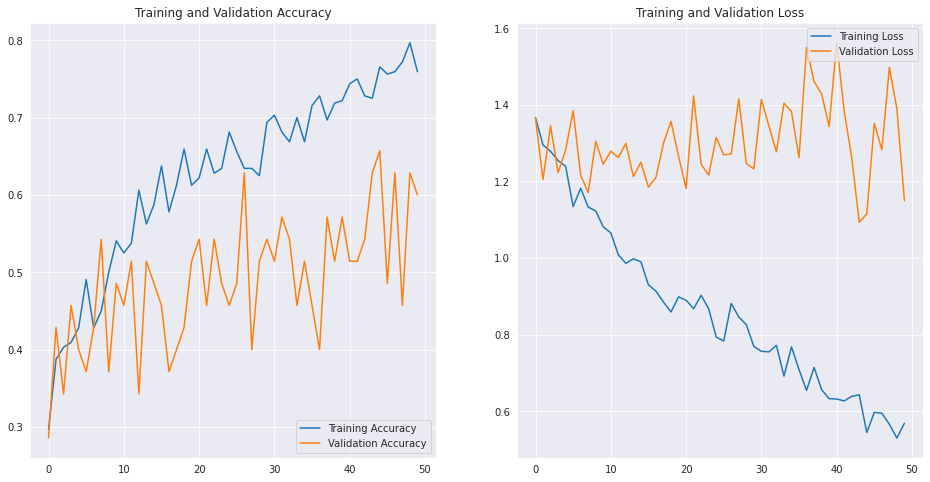

In [30]:
epochs=50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(epochs)

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, acc, label='Training Accuracy')
plt.plot(epoch_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch_range, loss, label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
model.evaluate(test_gen)

2/2 [==============================] - 0s 26ms/step - loss: 833.8223 - accuracy: 0.3590 - recall_2: 0.3590 - auc_2: 0.5726


[833.822265625, 0.3589743673801422, 0.3589743673801422, 0.5726495385169983]

In [63]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dropout, Flatten, Dense, Activation,GlobalAveragePooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import Recall,AUC
from tensorflow.keras.models import Model
from tensorflow.keras import layers

In [73]:
image_size = 224
input_shape = (image_size, image_size, 3)
model = Sequential()
model.add(layers.Input(shape = input_shape))
model.add(EfficientNetB0(weights = 'imagenet', include_top = False))

model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(4, activation = 'softmax'))

model.build()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1280)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 5124      
Total params: 4,054,695
Trainable params: 4,012,672
Non-trainable params: 42,023
_________________________________________________________________


In [78]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, 
                              min_delta = 0.01, mode = 'auto', verbose = 1)

In [81]:
print(valid_gen)

In [82]:
history = model.fit(train_gen,epochs=20,validation_data=valid_gen,batch_size=32, callbacks = [reduce_lr])

Epoch 1/20
10/10 [==============================] - 37s 4s/step - loss: 0.0370 - accuracy: 0.9937 - val_loss: 2.2594 - val_accuracy: 0.2571
Epoch 2/20
10/10 [==============================] - 36s 4s/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 2.2388 - val_accuracy: 0.2571
Epoch 3/20
10/10 [==============================] - 36s 4s/step - loss: 0.0168 - accuracy: 0.9937 - val_loss: 2.2440 - val_accuracy: 0.2571

Epoch 00003: ReduceLROnPlateau reducing learning rate to 8.100000013655517e-06.
Epoch 4/20
10/10 [==============================] - 36s 4s/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 2.2383 - val_accuracy: 0.2571
Epoch 5/20
10/10 [==============================] - 35s 4s/step - loss: 0.0219 - accuracy: 0.9906 - val_loss: 2.2676 - val_accuracy: 0.2571

Epoch 00005: ReduceLROnPlateau reducing learning rate to 2.429999949526973e-06.
Epoch 6/20
10/10 [==============================] - 36s 4s/step - loss: 0.0135 - accuracy: 0.9937 - val_loss: 2.3902 - val_accuracy: 0.257

KeyboardInterrupt: 

In [84]:
model.evaluate(test_gen)

2/2 [==============================] - 1s 197ms/step - loss: 9.2920 - accuracy: 0.3333


[9.291977882385254, 0.3333333432674408]